In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Press_RawDataSet 시트만 로드
file_path = './Press_RawDataSet.xlsx'
df = pd.read_excel(file_path, sheet_name='Press_RawDataSet')

In [17]:
df2 = df.copy()

In [18]:
df2

,idx,Machine_Name,Item No,working time,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,1,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,274.0,549.0
1,2,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,274.0,549.0
2,3,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,275.0,550.0
3,4,Press-01,ED5260,2020-05-04 00:00:00,550.0,275.0,275.0,550.0
4,5,Press-01,ED5260,2020-05-04 00:00:00,549.2,274.6,276.0,550.6
...,...,...,...,...,...,...,...,...
64354,4122,Press-01,ED5260,2020-05-29 00:00:00,550.0,275.0,267.0,542.0
64355,4123,Press-01,ED5260,2020-05-29 00:00:00,549.8,274.9,269.0,543.9
64356,4124,Press-01,ED5260,2020-05-29 00:00:00,549.8,274.9,269.0,543.9
64357,4125,Press-01,ED5260,2020-05-29 00:00:00,550.6,275.3,267.0,542.3


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64359 entries, 0 to 64358
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idx             64359 non-null  int64  
 1   Machine_Name    64359 non-null  object 
 2   Item No         64359 non-null  object 
 3   working time    64359 non-null  object 
 4   Press time(ms)  64359 non-null  float64
 5   Pressure 1      64359 non-null  float64
 6   Pressure 2      64359 non-null  float64
 7   Pressure 5      64359 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.9+ MB


In [20]:
df2.isnull().sum()

idx               0
Machine_Name      0
Item No           0
working time      0
Press time(ms)    0
Pressure 1        0
Pressure 2        0
Pressure 5        0
dtype: int64

In [21]:
df2['working time'] = pd.to_datetime(df2['working time'], errors='coerce')

In [22]:
start_date = pd.Timestamp('2020-05-04')
end_date   = pd.Timestamp('2020-05-29')
mask = df2['working time'].dt.normalize().between(start_date, end_date, inclusive='both')
df2 = df2.loc[mask].copy()
df2

,idx,Machine_Name,Item No,working time,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,1,Press-01,ED5260,2020-05-04,550.0,275.0,274.0,549.0
1,2,Press-01,ED5260,2020-05-04,550.0,275.0,274.0,549.0
2,3,Press-01,ED5260,2020-05-04,550.0,275.0,275.0,550.0
3,4,Press-01,ED5260,2020-05-04,550.0,275.0,275.0,550.0
4,5,Press-01,ED5260,2020-05-04,549.2,274.6,276.0,550.6
...,...,...,...,...,...,...,...,...
64354,4122,Press-01,ED5260,2020-05-29,550.0,275.0,267.0,542.0
64355,4123,Press-01,ED5260,2020-05-29,549.8,274.9,269.0,543.9
64356,4124,Press-01,ED5260,2020-05-29,549.8,274.9,269.0,543.9
64357,4125,Press-01,ED5260,2020-05-29,550.6,275.3,267.0,542.3


In [23]:
df2 = df2.drop(['idx', 'Machine_Name', 'Item No', 'working time'], axis = 1)

In [24]:
df2

,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,550.0,275.0,274.0,549.0
1,550.0,275.0,274.0,549.0
2,550.0,275.0,275.0,550.0
3,550.0,275.0,275.0,550.0
4,549.2,274.6,276.0,550.6
...,...,...,...,...
64354,550.0,275.0,267.0,542.0
64355,549.8,274.9,269.0,543.9
64356,549.8,274.9,269.0,543.9
64357,550.6,275.3,267.0,542.3


In [25]:
df2.reset_index(drop=True, inplace=True)

df2

,Press time(ms),Pressure 1,Pressure 2,Pressure 5
0,550.0,275.0,274.0,549.0
1,550.0,275.0,274.0,549.0
2,550.0,275.0,275.0,550.0
3,550.0,275.0,275.0,550.0
4,549.2,274.6,276.0,550.6
...,...,...,...,...
62720,550.0,275.0,267.0,542.0
62721,549.8,274.9,269.0,543.9
62722,549.8,274.9,269.0,543.9
62723,550.6,275.3,267.0,542.3


In [49]:
df2.columns

Index(['Press time(ms)', 'Pressure 1', 'Pressure 2', 'Pressure 5'], dtype='object')

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62725 entries, 0 to 62724
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Press time(ms)  62725 non-null  float64
 1   Pressure 1      62725 non-null  float64
 2   Pressure 2      62725 non-null  float64
 3   Pressure 5      62725 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


In [27]:
df2.describe()

,Press time(ms),Pressure 1,Pressure 2,Pressure 5
count,62725.000000,62725.000000,62725.000000,62725.000000
mean,550.135499,275.068069,269.839369,544.907995
std,2.093885,1.045703,2.964599,3.230605
min,499.000000,249.500000,251.800000,516.900000
25%,549.800000,274.900000,267.000000,542.100000
50%,550.000000,275.000000,269.000000,543.900000
75%,550.400000,275.200000,273.100000,548.100000
max,573.800000,286.900000,277.000000,562.500000


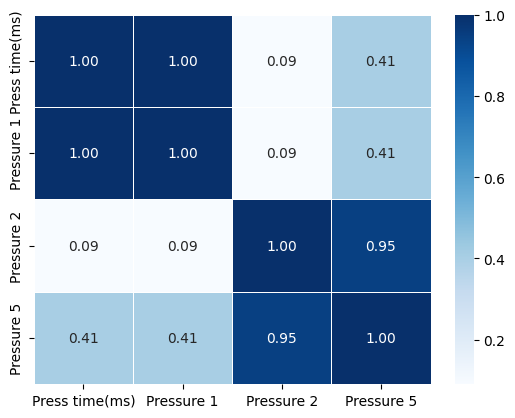

In [34]:
import seaborn as sns

sns.heatmap(data = df2.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

# 필요한 모듈 import

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

# 스케일링

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [63]:
# train/test 분리
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [64]:
# One-Class SVM 학습
model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
model.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.05)

In [65]:
# 예측 및 결과 확인
y_pred = model.predict(X_test)
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))  # {1: 정상, -1: 이상치}

{-1: 618, 1: 11927}


In [67]:
import pandas as pd

df = pd.read_csv('./DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [68]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
